In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
holiday = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\predictive modeling\project\Holiday_Package-1.csv")

In [3]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
holiday.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
# dropping of features Unnamed: 0 as it is just a serial number 
holiday.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
holiday.shape

(872, 7)

In [7]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [8]:
holiday.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [9]:
dups = holiday.duplicated()
print("Number of duplicates rows is :", dups.sum())

Number of duplicates rows is : 0


In [10]:
for feature in holiday.columns: 
    if holiday[feature].dtype == 'object': 
        print(feature)
        print(holiday[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




## Univariate analysis

In [11]:
holiday.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


Salary


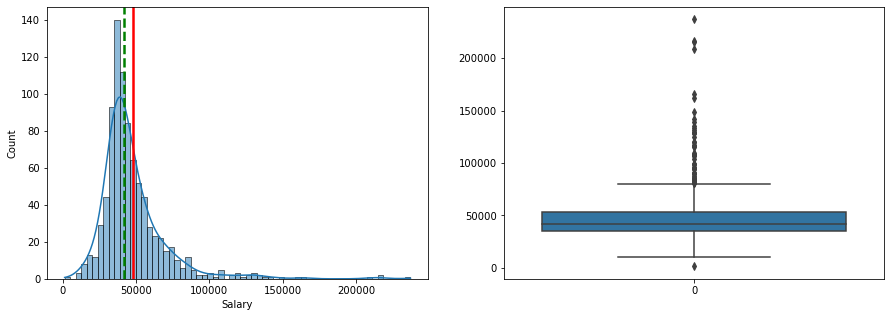

age


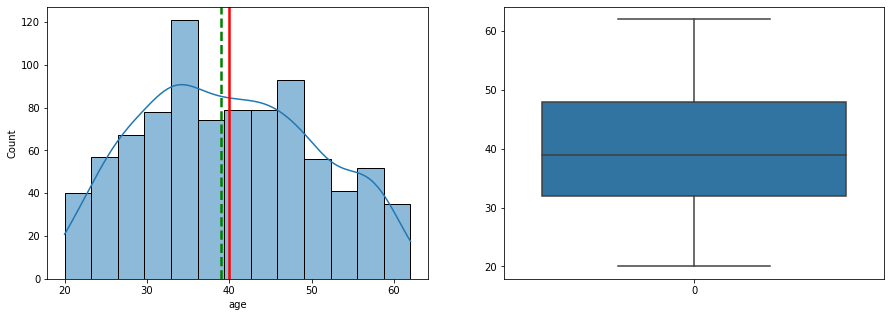

educ


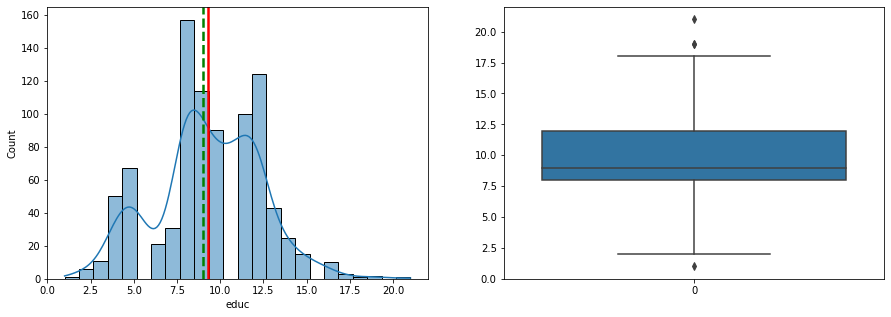

no_young_children


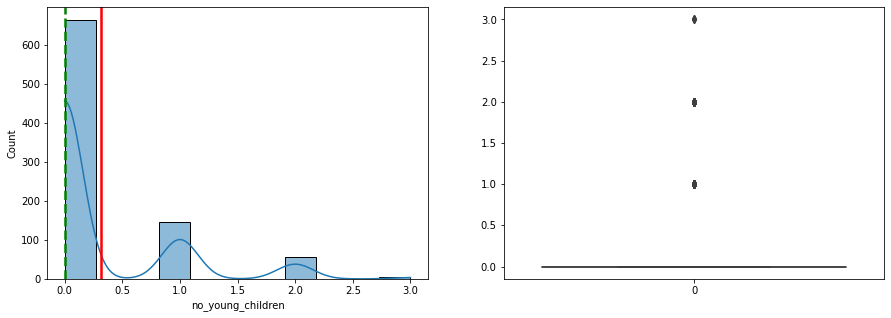

no_older_children


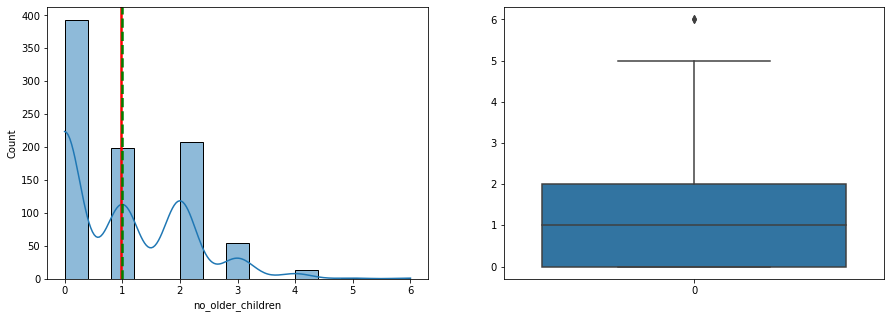

In [12]:
cols = ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']
for col in cols:
    print(col)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(holiday[col], kde = True)
    plt.axvline(holiday[col].mean(), ymin = 0, ymax = 1, linewidth = 2.5, color = 'red')
    plt.axvline(holiday[col].median(), ymin = 0, ymax = 1, linewidth = 2.5, color = 'green', linestyle = '--')
    plt.subplot(122)
    sns.boxplot(data = holiday[col])
    
    plt.show()

In [13]:
kur = pd.DataFrame(np.round(holiday.kurtosis(), 3))
kur.rename(columns = {0 : 'Kurtosis'}, inplace = True)
ske = pd.DataFrame(np.round(holiday.skew(), 3))
ske.rename(columns = { 0 : 'Skew'}, inplace = True)
d_f = kur.join(ske, how = 'outer')
d_f

,Kurtosis,Skew
Salary,15.853,3.103
age,-0.910,0.146
educ,0.006,-0.046
no_young_children,3.110,1.947
no_older_children,0.676,0.954


#### Not treating outliers as these outliers are significant in case of this dataset.

## Bi-variate analysis

In [14]:
corr = holiday.corr()
corr

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


<AxesSubplot:>

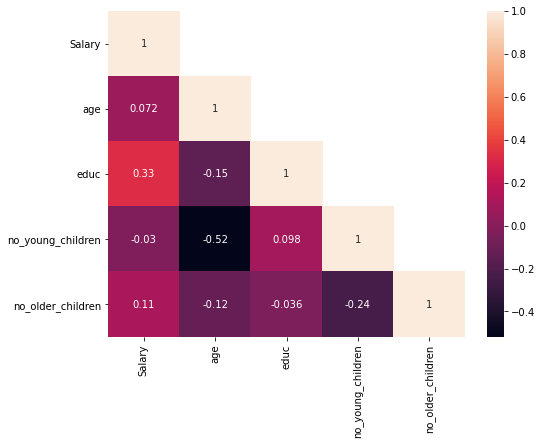

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, mask = np.triu(corr, +1))

<Figure size 864x576 with 0 Axes>

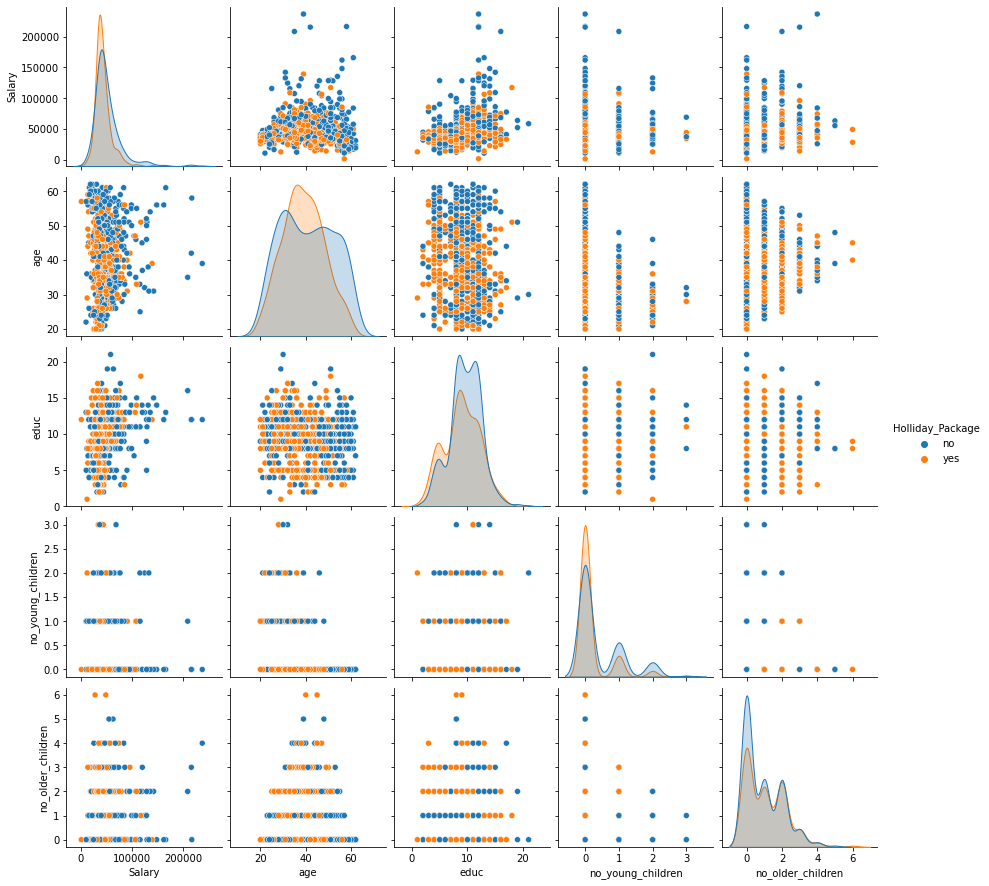

In [16]:
plt.figure(figsize=(12,8))
sns.pairplot(holiday, diag_kind = 'kde', hue = 'Holliday_Package')

### Univariate analysis for Categorical Features

In [17]:
holiday.describe(include = 'object')

,Holliday_Package,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


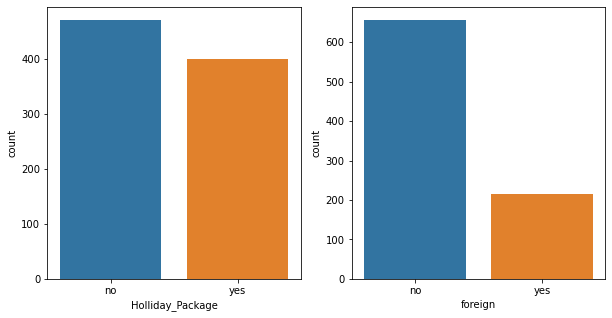

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(holiday['Holliday_Package'])
plt.subplot(122)
sns.countplot(holiday['foreign'])
plt.show()

### Bi-variate analysis between target variable and continous variable

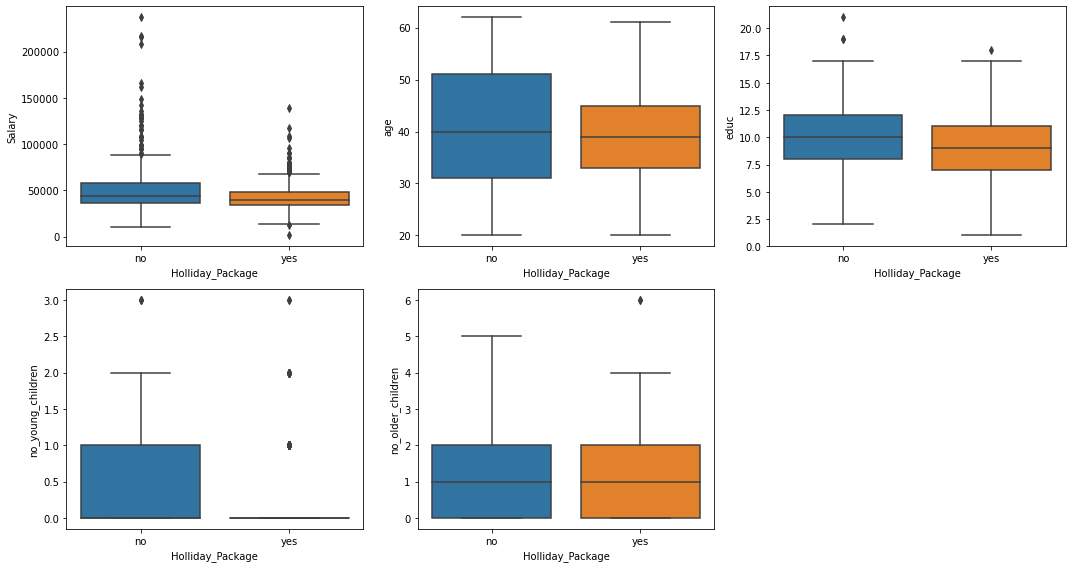

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(231)
sns.boxplot(x = holiday['Holliday_Package'], y = holiday['Salary'])

plt.subplot(232)
sns.boxplot(x = holiday['Holliday_Package'], y = holiday['age'])

plt.subplot(233)
sns.boxplot(x = holiday['Holliday_Package'], y = holiday['educ'])

plt.subplot(234)
sns.boxplot(x = holiday['Holliday_Package'], y = holiday['no_young_children'])

plt.subplot(235)
sns.boxplot(x = holiday['Holliday_Package'], y = holiday['no_older_children'])

plt.tight_layout()
plt.show()

In [20]:
pd.DataFrame(data = holiday.groupby("Holliday_Package").agg(['std', 'median'])).T

Holliday_Package                    no           yes
Salary            std     27834.236979  15579.171212
                  median  43940.000000  39809.000000
age               std        11.612254      9.051521
                  median     40.000000     39.000000
educ              std         2.851482      3.210779
                  median     10.000000      9.000000
no_young_children std         0.677786      0.503578
                  median      0.000000      0.000000
no_older_children std         1.063422      1.107479
                  median      1.000000      1.000000

### Treating the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.

In [21]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [22]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [23]:
## Converting the 'Holliday_Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [24]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

holiday['Holliday_Package'] = LE.fit_transform(holiday['Holliday_Package'])
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,no
1,1,37207,45,8,0,1,no
2,0,58022,46,9,0,0,no
3,0,66503,31,11,2,0,no
4,0,66734,44,12,0,2,no


In [25]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    int32 
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int32(1), int64(5), object(1)
memory usage: 44.4+ KB


In [26]:
## Converting the other 'object' type variables as dummy variables

holiday_dummy = pd.get_dummies(holiday, drop_first = True)
holiday_dummy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [27]:
holiday_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign_yes        872 non-null    uint8
dtypes: int32(1), int64(5), uint8(1)
memory usage: 38.4 KB


## Model 1: Building model using all variables

In [28]:
import statsmodels.formula.api as SM

In [29]:
model_1 = SM.logit(formula = 'Holliday_Package~Salary+age+educ+no_young_children+no_older_children+foreign_yes', data = holiday_dummy).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1281
Time:                        21:29:08   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
no_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
no_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign_yes           1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

In [30]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = "y~x", data = x_vars).fit().rsquared  
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)

In [31]:
vif_cal(input_data = holiday_dummy[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign_yes']])

Salary  VIF =  1.17
age  VIF =  1.58
educ  VIF =  1.4
no_young_children  VIF =  1.57
no_older_children  VIF =  1.19
foreign_yes  VIF =  1.27


## Model 2: Building model by dropping the variable with highest p-value i.e. no_older_children

In [32]:
model_2 = SM.logit(formula = 'Holliday_Package~Salary+age+educ+no_young_children+foreign_yes', data = holiday_dummy).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.601574
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1281
Time:                        21:29:15   Log-Likelihood:                -524.57
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.808e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2705      0.516      4.403      0.000       1.260       3.281
Salary            -1.831e-05   4.31e-06     -4.249      0.000   -2.68e-05   -9.86e-06
age                  -0.0474      0.009     -5.511      0.000      -0.064      -0.031
educ                  0.0399      0.029      1.367      0.172      -0.017       0.097
no_young_children    -1.3004      0.169     -7.711      0.000      -1.631      -0.970
foreign_yes           1.3210      0.200      6.599      0.000       0.929       1.713
=====================================================================================
"""

In [33]:
vif_cal(input_data = holiday_dummy[['Salary', 'age', 'educ', 'no_young_children', 'foreign_yes']])

Salary  VIF =  1.14
age  VIF =  1.43
educ  VIF =  1.39
no_young_children  VIF =  1.37
foreign_yes  VIF =  1.27


## Model 3: Building the model, droping the variable with highest p-value i.e. educ

In [34]:
model_3 = SM.logit(formula = 'Holliday_Package~Salary+age+no_young_children+foreign_yes', data = holiday_dummy).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1265
Time:                        21:29:18   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
Salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
no_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
foreign_yes           1.2124      0.183      6.634      0.000       0.854       1.571
=====================================================================================
"""

In [35]:
vif_cal(input_data = holiday_dummy[['Salary', 'age', 'no_young_children', 'foreign_yes']])

Salary  VIF =  1.05
age  VIF =  1.38
no_young_children  VIF =  1.37
foreign_yes  VIF =  1.05


## Model 4: Building model with addition of new variable total_children

In [36]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,no
1,1,37207,45,8,0,1,no
2,0,58022,46,9,0,0,no
3,0,66503,31,11,2,0,no
4,0,66734,44,12,0,2,no


In [37]:
holiday['total_children'] = holiday['no_young_children'] + holiday['no_older_children']
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,total_children
0,0,48412,30,8,1,1,no,2
1,1,37207,45,8,0,1,no,1
2,0,58022,46,9,0,0,no,0
3,0,66503,31,11,2,0,no,2
4,0,66734,44,12,0,2,no,2


In [38]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    int32 
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
 7   total_children     872 non-null    int64 
dtypes: int32(1), int64(6), object(1)
memory usage: 51.2+ KB


In [39]:
dummy_holiday = pd.get_dummies(holiday, drop_first = True)
dummy_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,total_children,foreign_yes
0,0,48412,30,8,1,1,2,0
1,1,37207,45,8,0,1,1,0
2,0,58022,46,9,0,0,0,0
3,0,66503,31,11,2,0,2,0
4,0,66734,44,12,0,2,2,0


In [40]:
dummy_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   total_children     872 non-null    int64
 7   foreign_yes        872 non-null    uint8
dtypes: int32(1), int64(6), uint8(1)
memory usage: 45.3 KB


In [41]:
model_4 = SM.logit(formula = 'Holliday_Package~Salary+age+educ+total_children+foreign_yes', data = dummy_holiday).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.642532
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                 0.06869
Time:                        21:30:13   Log-Likelihood:                -560.29
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 2.343e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7656      0.490      1.561      0.119      -0.196       1.727
Salary          -1.59e-05    4.1e-06     -3.880      0.000   -2.39e-05   -7.87e-06
age               -0.0146      0.008     -1.919      0.055      -0.030       0.000
educ               0.0260      0.028      0.928      0.354      -0.029       0.081
total_children    -0.0945      0.072     -1.322      0.186      -0.235       0.046
foreign_yes        1.1347      0.187      6.052      0.000       0.767       1.502
==================================================================================
"""

In [42]:
vif_cal(input_data = dummy_holiday[['Salary', 'age','educ', 'total_children', 'foreign_yes']])

Salary  VIF =  1.17
age  VIF =  1.29
educ  VIF =  1.4
total_children  VIF =  1.22
foreign_yes  VIF =  1.26


# Problem 2.3

## Splitting the model.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
Train, Test = train_test_split(holiday_dummy, test_size=0.3, random_state=1, stratify = holiday_dummy['Holliday_Package'])

In [45]:
print(Train['Holliday_Package'].value_counts(normalize = True),'\n')
print(Test['Holliday_Package'].value_counts(normalize = True))

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64 

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64


## Building the models 1 and 2 on the training data, checking the accuracy score of both the models on the training data and using models to predict the classes and the corresponding probabilities on the test data. 

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(solver = 'newton-cg', penalty='none')

### Model 1 predicting the classes and probabilities on Train data

In [48]:
model_t_1 = LogisticRegression(solver = 'newton-cg', penalty='none', max_iter=300)
model_t_1 = model_t_1.fit(Train[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign_yes']], Train['Holliday_Package'])

# Predicting on the Training Data
model_t_1_pred_train = model_t_1.predict(Train[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign_yes']])

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
cnf_matrix = confusion_matrix(Train['Holliday_Package'], model_t_1_pred_train)
cnf_matrix

array([[245,  84],
       [119, 162]], dtype=int64)

In [51]:
report_1 = classification_report(Train['Holliday_Package'], model_t_1_pred_train)
print('Classification Report for Train set')
print(report_1)

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Model 1 - Predicting the classes and the probabilities on the Test Data

In [52]:
# Predicting on the Test Data
model_t_1_pred_test = model_t_1.predict(Test[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign_yes']])

# Getting probabilities for Test Data
model_t_1_pred_test_prob = model_t_1.predict_proba(Test[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign_yes']])[:, 1]

In [53]:
print("The test prediction is : ", model_t_1_pred_test)
print('\n')
print("The probability of test is ", model_t_1_pred_test_prob)

The test prediction is :  [0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0]


The probability of test is  [0.31469359 0.45986655 0.30300411 0.50312272 0.44250292 0.67320125
 0.45265027 0.70080564 0.61355716 0.38722786 0.43120809 0.82019638
 0.54368596 0.471925   0.60831029 0.67541571 0.56227629 0.20128167
 0.43153435 0.39021692 0.71668447 0.39732295 0.15417325 0.40357275
 0.7787997  0.67681493 0.42579772 0.2658019  0.4593811  0.68227903
 0.48630683 0.02442526 0.68374534 0.33218734 0.6260896  0.23833968
 0.807349

In [54]:
cnf_matrix_test = confusion_matrix(Test['Holliday_Package'], model_t_1_pred_test)
cnf_matrix_test

array([[109,  33],
       [ 58,  62]], dtype=int64)

In [55]:
cr_test = classification_report(Test['Holliday_Package'], model_t_1_pred_test)
print("Classification Report for Test set:")
print(cr_test)

Classification Report for Test set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



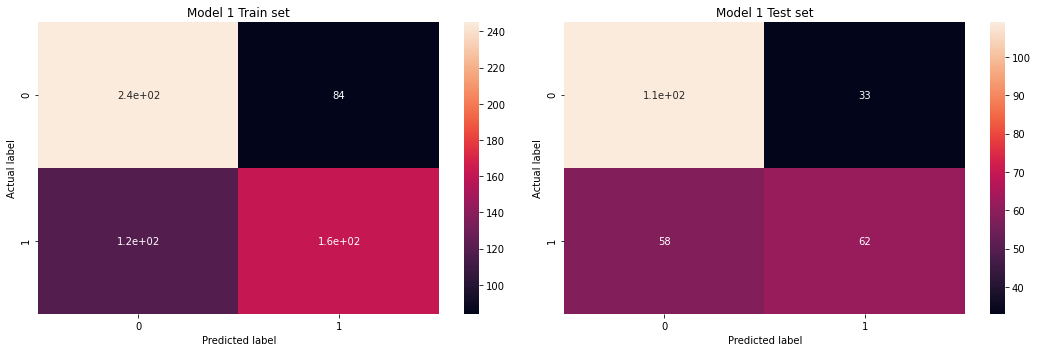

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Model 1 Train set")
sns.heatmap(confusion_matrix(Train['Holliday_Package'], model_t_1_pred_train), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(122)
plt.title("Model 1 Test set")
sns.heatmap(confusion_matrix(Test['Holliday_Package'], model_t_1_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.tight_layout()
plt.show()

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [57]:
model_t_2 = LogisticRegression( solver = 'newton-cg', penalty='none', max_iter = 300)
model_t_2 = model_t_2.fit(Train[['Salary', 'age', 'educ', 'no_young_children', 'foreign_yes']], Train['Holliday_Package'])

# Predicting on the Training Data
model_t_2_pred_train = model_t_2.predict(Train[['Salary', 'age', 'educ', 'no_young_children', 'foreign_yes']])

In [58]:
cr_2 = classification_report(Train['Holliday_Package'], model_t_2_pred_train)
print("Classification Report for Train set Model 2 :")
print(cr_2)

Classification Report for Train set Model 2 :
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



### Model 2 - Predicting the classes and the probabilities on the Test Data

In [59]:
# Predicting on the Test Data
model_t_2_pred_test = model_t_2.predict(Test[['Salary', 'age', 'educ', 'no_young_children', 'foreign_yes']])

# Getting probabilities for Test Data
model_t_2_pred_test_prob = model_t_2.predict_proba(Test[['Salary', 'age', 'educ', 'no_young_children', 'foreign_yes']])[:, 1]

In [60]:
cr_2_test = classification_report(Test['Holliday_Package'], model_t_2_pred_test)
print("Classification Report for Test set Model 2 :")
print(cr_2_test)

Classification Report for Test set Model 2 :
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       142
           1       0.66      0.54      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262



In [61]:
cnf_matrix_2 = confusion_matrix(Test['Holliday_Package'], model_t_2_pred_test)
cnf_matrix_2

array([[108,  34],
       [ 55,  65]], dtype=int64)

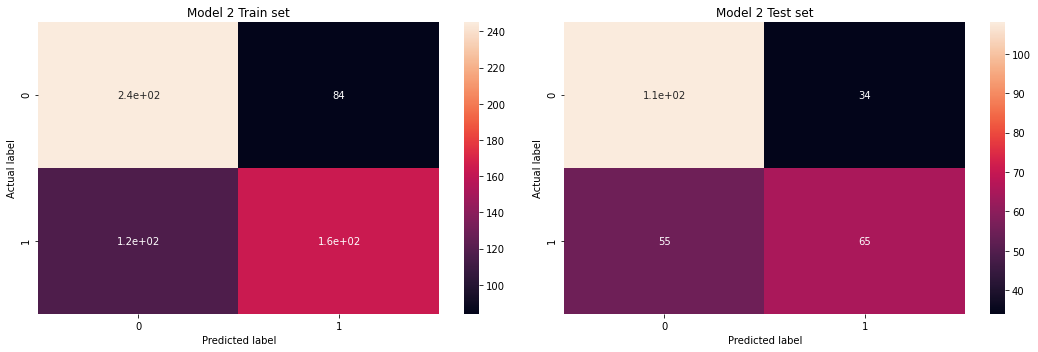

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Model 2 Train set")
sns.heatmap(confusion_matrix(Train['Holliday_Package'], model_t_2_pred_train), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(122)
plt.title("Model 2 Test set")
sns.heatmap(confusion_matrix(Test['Holliday_Package'], model_t_2_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.tight_layout()
plt.show()

### Model 3: Building model by dropping educ

In [63]:
model_t_3 = LogisticRegression( solver = 'newton-cg', penalty='none', max_iter = 300)
model_t_3 = model_t_3.fit(Train[['Salary', 'age', 'no_young_children', 'foreign_yes']], Train['Holliday_Package'])

# Predicting on the Training Data
model_t_3_pred_train = model_t_3.predict(Train[['Salary', 'age', 'no_young_children', 'foreign_yes']])

In [64]:
cr_3 = classification_report(Train['Holliday_Package'], model_t_3_pred_train)
print("Classification Report for Train set Model 3 :")
print(cr_3)

Classification Report for Train set Model 3 :
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610



### Model 3 - Predicting the classes and the probabilities on the Test Data

In [65]:
# Predicting on the Test Data
model_t_3_pred_test = model_t_3.predict(Test[['Salary', 'age', 'no_young_children', 'foreign_yes']])

# Getting probabilities for Test Data
model_t_3_pred_test_prob = model_t_3.predict_proba(Test[['Salary', 'age', 'no_young_children', 'foreign_yes']])[:, 1]

In [66]:
cr_3_test = classification_report(Test['Holliday_Package'], model_t_3_pred_test)
print("Classification Report for Test set Model 3 :")
print(cr_3_test)

Classification Report for Test set Model 3 :
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.68      0.56      0.61       120

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.67       262



In [67]:
cnf_matrix_3 = confusion_matrix(Test['Holliday_Package'], model_t_3_pred_test)
cnf_matrix_3

array([[110,  32],
       [ 53,  67]], dtype=int64)

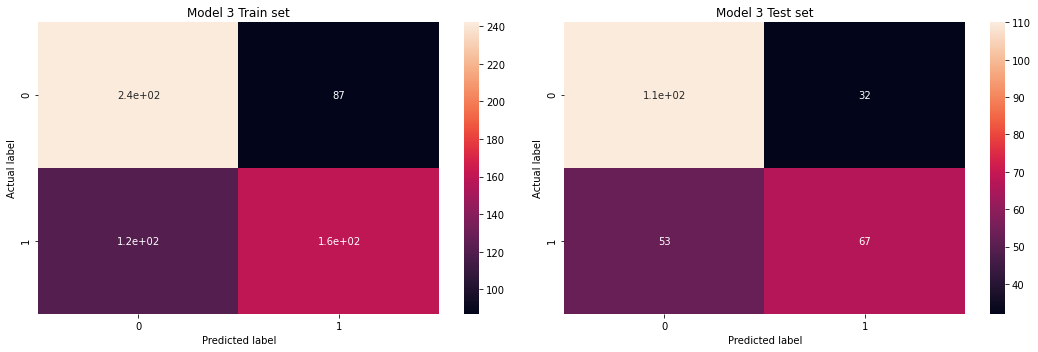

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Model 3 Train set")
sns.heatmap(confusion_matrix(Train['Holliday_Package'], model_t_3_pred_train), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(122)
plt.title("Model 3 Test set")
sns.heatmap(confusion_matrix(Test['Holliday_Package'], model_t_3_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.tight_layout()
plt.show()

#### Confusion martix

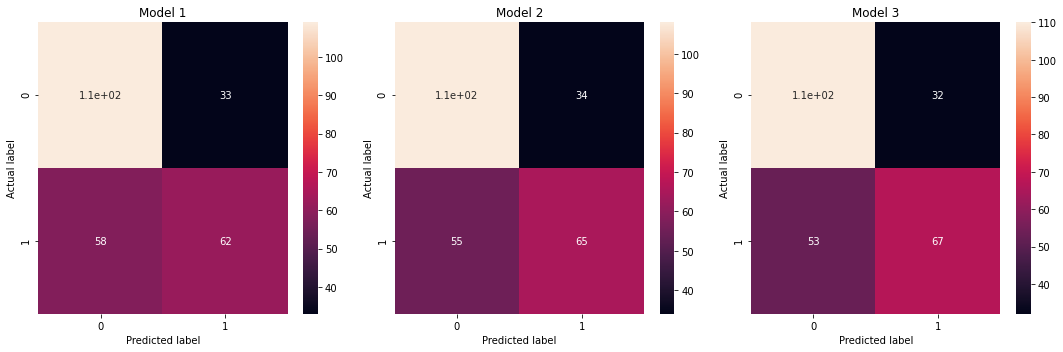

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Model 1")
sns.heatmap(confusion_matrix(Test['Holliday_Package'], model_t_1_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(132)
plt.title("Model 2")
sns.heatmap(confusion_matrix(Test['Holliday_Package'], model_t_2_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(133)
plt.title("Model 3")
sns.heatmap(confusion_matrix(Test['Holliday_Package'], model_t_3_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.tight_layout()
plt.show()

### Checking the summary statistics of the AUC-ROC curve for both the Logistic Regression Models built for the test data.

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

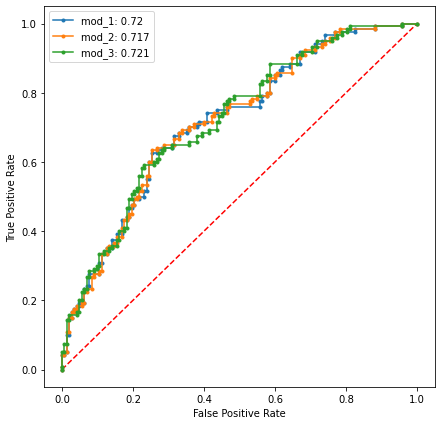

In [71]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(Test['Holliday_Package'], model_t_1_pred_test_prob) # Model 1
auc = roc_auc_score(Test['Holliday_Package'], model_t_1_pred_test_prob) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.', label = 'mod_1: %.2f'% auc)

fpr2, tpr2, thresholds2 = roc_curve(Test['Holliday_Package'], model_t_2_pred_test_prob) # Model 2
auc = roc_auc_score(Test['Holliday_Package'], model_t_2_pred_test_prob) # getting AUC for the model
plt.plot(fpr2, tpr2, marker='.', label = 'mod_2: %.3f'% auc)

fpr3, tpr3, thresholds3 = roc_curve(Test['Holliday_Package'], model_t_3_pred_test_prob) # Model 3
auc = roc_auc_score(Test['Holliday_Package'], model_t_3_pred_test_prob) # getting AUC for the model
plt.plot(fpr3, tpr3, marker='.', label = 'mod_3: %.3f'% auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [93]:
## By looking at the auc-roc curve it is clear that model 3 is performing slightly better.